In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

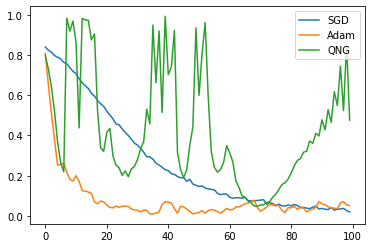

In [56]:
state = 'w'
ansatz = 'linear_ansatz_'
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_sgd.csv'
loss1 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_adam.csv'
loss2 = pd.read_csv(path, sep=",", header=None).to_numpy()
path = "../experiments/" + ansatz + state + "/" + str(3) + '/loss_values_qng.csv'
loss3 = pd.read_csv(path, sep=",", header=None).to_numpy()
plt.plot(loss1, label = 'SGD')
plt.plot(loss2, label = 'Adam')
plt.plot(loss3, label = 'QNG')
plt.savefig(state.upper() + ' state - ' + ansatz + '.eps', dpi = 1000)
plt.legend()

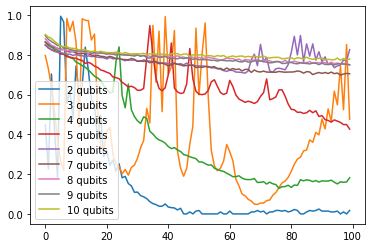

In [57]:
losss = []

for i in range(2, 11):
    path = "../experiments/linear_ansatz_w/" + str(i) + '/loss_values_qng.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')
plt.legend()
plt.show()

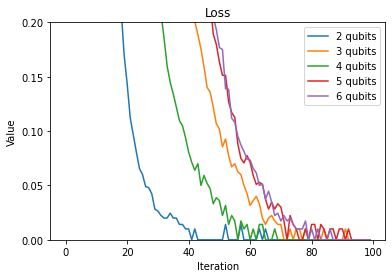

In [53]:
losss = []

for i in range(2, 7):
    path = "../experiments/star_ansatz_ghz/" + str(i) + '/loss_values_sgd.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = str(i) + ' qubits')

plt.xlabel('Iteration')
plt.ylim((0,0.2))
plt.yticks(np.arange(0, 0.25, 0.05))
plt.ylabel('Value')
plt.title('Loss')
plt.legend()
plt.show()

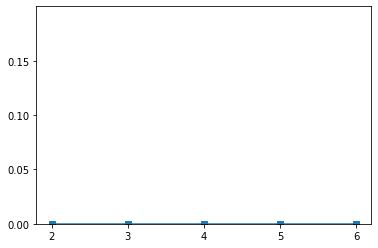

In [62]:
qubits = range(2, 7)
star_ansatz = []
for i in qubits:
    path = "../experiments/star_ansatz_" + 'ghz' + "/" + str(i) + '/loss_values_' + 'sgd' + '.csv'
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    star_ansatz.append((loss[-1]))

plt.ylim((0,0.2))
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(0, 0.2, 0.05))
plt.plot(qubits, star_ansatz, marker='s', label = 'Star ansatz')


In [49]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/linear_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_linear.append(np.min(loss))
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))
    for i in qubits:
        path = "../experiments/polygon_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_polygon.append(np.min(loss))
    plt.plot(qubits, losss_linear, marker='o', color = 'blue', label = 'Linear ansatz')
    plt.plot(qubits, losss_star, marker='s', color = 'orange', label = 'Star ansatz')
    plt.plot(qubits, losss_polygon, marker='^', color = 'green', label = 'Polygon ansatz')
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.2, 0.2))
    plt.ylabel('Fubini-study loss')
    # plt.text(3.5, 0.5, optimizer.upper())
    plt.title(reconstruted_state.upper() + ' state preparation')
    plt.legend()
    plt.savefig(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer.eps', dpi = 1000)
    plt.show()

# get_loss('ghz', 'qng')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


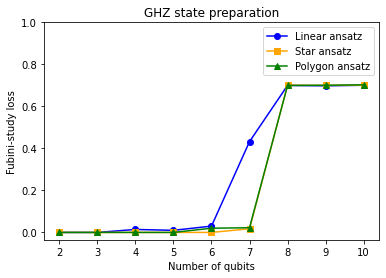

In [50]:
get_loss('ghz', 'adam')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


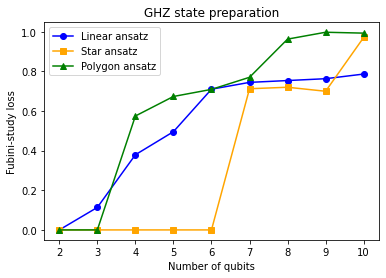

In [52]:
get_loss('ghz', 'sgd')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


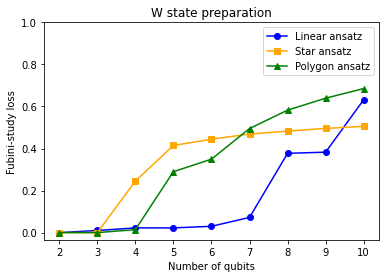

In [55]:
get_loss('w', 'adam')

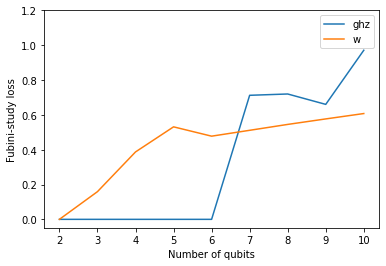

In [43]:
def get_loss(reconstruted_state, optimizer):
    losss_linear, losss_star, losss_polygon = [], [], []
    qubits = range(2, 11)
    for i in qubits:
        path = "../experiments/star_ansatz_" + reconstruted_state + "/" + str(i) + '/loss_values_' + optimizer + '.csv'
        loss = pd.read_csv(path, sep=",", header=None).to_numpy()
        losss_star.append(np.min(loss))

    plt.plot(qubits, losss_star, label = reconstruted_state)
    plt.xlabel('Number of qubits')
    plt.yticks(np.arange(0, 1.4, 0.2))
    plt.ylabel('Fubini-study loss')
    # plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
    plt.legend()

get_loss('ghz', 'sgd')
get_loss('w', 'sgd')
plt.show()

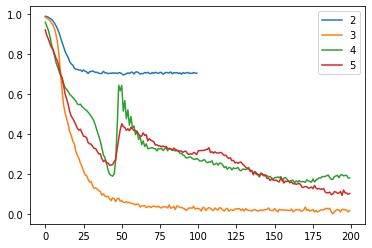

In [32]:
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    plt.plot(loss, label = i)
plt.legend()

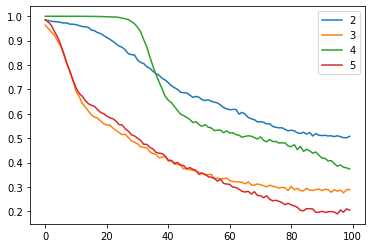

In [26]:
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()[:100]
    plt.plot(loss, label = i)
plt.legend()

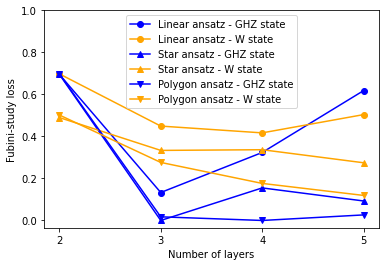

In [29]:
losss_polygon_ghz, losss_polygon_w, losss_star_ghz, losss_star_w, losss_linear_ghz, losss_linear_w = [], [], [], [], [], []
num_layers = range(2, 6)
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_polygon_w.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/polygon_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/polygon_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_polygon_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/star_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/star_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_star_w.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/linear_ansatz_ghz/7/loss_values_qng.csv"
    else:
        path = "../experiments/linear_ansatz_ghz/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_linear_ghz.append(np.min(loss))
for i in num_layers:
    if i == 2:
        path = "../experiments/linear_ansatz_w/7/loss_values_qng.csv"
    else:
        path = "../experiments/linear_ansatz_w/7/loss_values_qng" + str(i) + ".csv"
    loss = pd.read_csv(path, sep=",", header=None).to_numpy()
    losss_linear_w.append(np.min(loss))

plt.plot(num_layers, losss_linear_ghz, marker='o', color='blue', label = 'Linear ansatz - GHZ state')
plt.plot(num_layers, losss_linear_w, marker='o', color='orange', label = 'Linear ansatz - W state')
plt.plot(num_layers, losss_star_ghz, marker='^', color='blue', label = 'Star ansatz - GHZ state')
plt.plot(num_layers, losss_star_w, marker='^', color='orange',label = 'Star ansatz - W state')
plt.plot(num_layers, losss_polygon_ghz, marker='v', color='blue', label = 'Polygon ansatz - GHZ state')
plt.plot(num_layers, losss_polygon_w, marker='v', color='orange', label = 'Polygon ansatz - W state')
plt.xlabel('Number of layers')
plt.xticks(np.arange(2, 6, 1))
plt.yticks(np.arange(0, 1.2, 0.2))
plt.ylabel('Fubini-study loss')
# plt.title(reconstruted_state.upper() + ' state - ' + optimizer.upper() + ' optimizer')
plt.legend()

In [15]:
losss_linear_ghz

[0.6956292115775472,
 0.13304134695650088,
 0.32357379374726875,
 0.6182232606429493]

In [16]:
losss_linear_w

[0.6956292115775472,
 0.13304134695650088,
 0.32357379374726875,
 0.6182232606429493]

In [14]:
losss_polygon_w

[0.5020956084253276, 0.2762245463386627, 0.176351920885484, 0.1191637528781298]